# Implementación de PCA

In [70]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
#Encontrar eigenvectores
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
#df["target"] = iris.target
#df["target_name"] = iris.target_names[iris.target]

X =iris.data
y = iris.target
media_X = np.mean(X, axis=0)        
#autovalores, autovectores = np.linalg.eig(X)
X_media = X - media_X



In [62]:
X_media_T = X_media.T

In [63]:
X_cuadrada = X_media_T  @ X_media

In [64]:
X_cuadrada

array([[102.16833333,  -6.32266667, 189.873     ,  76.92433333],
       [ -6.32266667,  28.30693333, -49.1188    , -18.12426667],
       [189.873     , -49.1188    , 464.3254    , 193.0458    ],
       [ 76.92433333, -18.12426667, 193.0458    ,  86.56993333]])

In [65]:
n = X.shape[0]
cov = (X_media.T @ X_media) / (n - 1)
autovalores, autovectores = np.linalg.eig(X_cuadrada)

In [66]:
com_x = np.argsort(autovalores)[::-1]
autovalores = autovalores[com_x]
autovectores = autovectores[:, com_x]

print("Autovalores:", autovalores)
print("Autovectores:\n", autovectores)


Autovalores: [630.0080142   36.15794144  11.65321551   3.55142885]
Autovectores:
 [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [67]:
#Ocupamos unicamente el primer vector ya que representa el  92% de los datos 
E2 = autovectores[:, :2]
Y = X_media @ E2

In [68]:
print("Shape de Y:", Y.shape)
print("Primeras filas de Y:\n", Y[:5])
print("Varianza explicada por PC1 y PC2:", autovalores[:2] / autovalores.sum())

Shape de Y: (150, 2)
Primeras filas de Y:
 [[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]]
Varianza explicada por PC1 y PC2: [0.92461872 0.05306648]


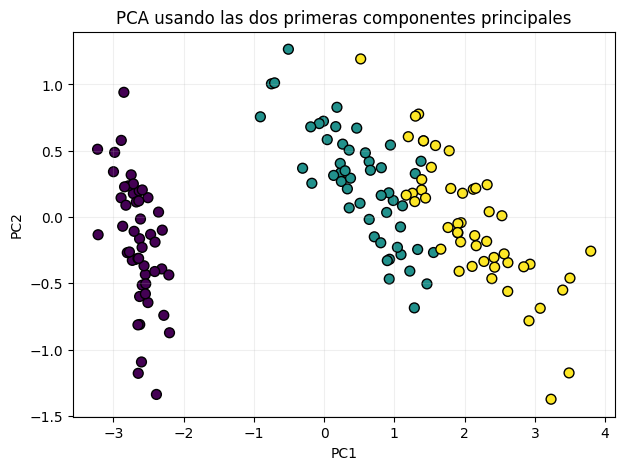

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(Y[:,0], Y[:,1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA usando las dos primeras componentes principales")
plt.grid(alpha=0.2)
plt.show()

In [ ]:
X_Nueva = (Y @ E2.T) + media_X

In [72]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(X,X_Nueva)
print(f"MSE de reconstrucción usando 2 componentes: {mse:.6f}")

MSE de reconstrucción usando 2 componentes: 0.025341


In [ ]:
print("\nPrimeras 5 filas (original | reconstrucción):")
for i in range(5):
    print(f"Muestra {i}:")
    print("  Original:", X[i])
    print("  Nueva:", X_Nueva[i])
    print("  Diferencia :", X[i] - X_Nueva[i])
    print()


Primeras 5 filas (original | reconstrucción):
Muestra 0:
  Original: [5.1 3.5 1.4 0.2]
  Nueva: [5.08303897 3.51741393 1.40321372 0.21353169]
  Diferencia : [ 0.01696103 -0.01741393 -0.00321372 -0.01353169]

Muestra 1:
  Original: [4.9 3.  1.4 0.2]
  Nueva: [4.7462619  3.15749994 1.46356177 0.24024592]
  Diferencia : [ 0.1537381  -0.15749994 -0.06356177 -0.04024592]

Muestra 2:
  Original: [4.7 3.2 1.3 0.2]
  Nueva: [4.70411871 3.1956816  1.30821697 0.17518015]
  Diferencia : [-0.00411871  0.0043184  -0.00821697  0.02481985]

Muestra 3:
  Original: [4.6 3.1 1.5 0.2]
  Nueva: [4.6422117  3.05696697 1.46132981 0.23973218]
  Diferencia : [-0.0422117   0.04303303  0.03867019 -0.03973218]

Muestra 4:
  Original: [5.  3.6 1.4 0.2]
  Nueva: [5.07175511 3.52655486 1.36373845 0.19699991]
  Diferencia : [-0.07175511  0.07344514  0.03626155  0.00300009]



=== Resultados PCA ===
Datos originales: (150, 4)
Datos transformados: (150, 2)

Autovalores:
  Componente 1: 4.2282 (92.46%)
  Componente 2: 0.2427 (5.31%)
  Componente 3: 0.0782 (1.71%)
  Componente 4: 0.0238 (0.52%)

Varianza total explicada por 2 componentes: 97.77%

MSE de reconstrucción usando 2 componentes: 0.025341

Autovectores (columnas):
  PC1: [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
  PC2: [-0.65658877 -0.73016143  0.17337266  0.07548102]


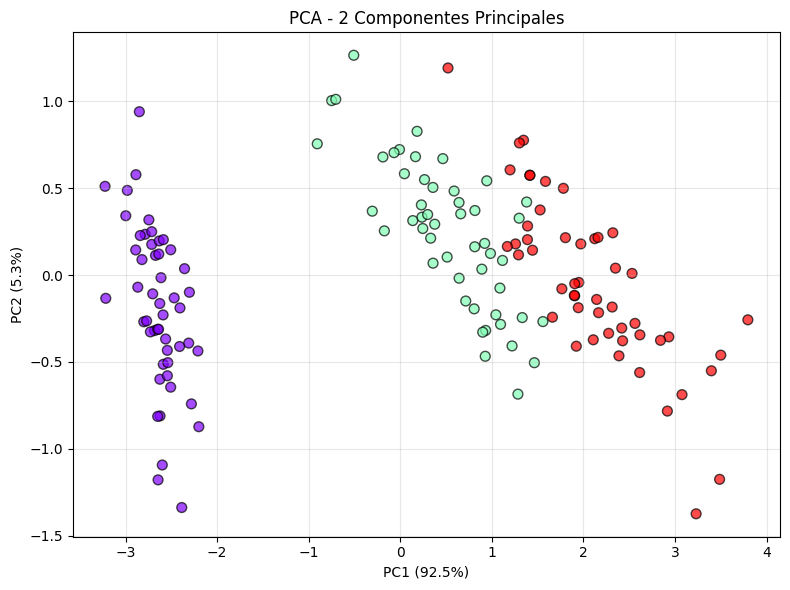


=== Primeras 5 filas transformadas ===
        PC1       PC2  target
0 -2.684126 -0.319397       0
1 -2.714142  0.177001       0
2 -2.888991  0.144949       0
3 -2.745343  0.318299       0
4 -2.728717 -0.326755       0

=== Comparación reconstrucción (primeras 3 muestras) ===

Muestra 0:
  Original:    [5.1 3.5 1.4 0.2]
  Reconstruido: [5.08303897 3.51741393 1.40321372 0.21353169]
  Diferencia:   [ 0.01696103 -0.01741393 -0.00321372 -0.01353169]

Muestra 1:
  Original:    [4.9 3.  1.4 0.2]
  Reconstruido: [4.7462619  3.15749994 1.46356177 0.24024592]
  Diferencia:   [ 0.1537381  -0.15749994 -0.06356177 -0.04024592]

Muestra 2:
  Original:    [4.7 3.2 1.3 0.2]
  Reconstruido: [4.70411871 3.1956816  1.30821697 0.17518015]
  Diferencia:   [-0.00411871  0.0043184  -0.00821697  0.02481985]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def aplicar_pca(dataframe, n_componentes=2, graficar=True, mostrar_detalles=True):
    Copia=dataframe.drop(columns=['target'])
    X = Copia.values
    media_X = np.mean(X, axis=0)
    X_centrado = X - media_X
    
    n = X.shape[0]
    X_cuadrada = X_centrado.T @ X_centrado
    cov = X_cuadrada / (n - 1)
    
    autovalores, autovectores = np.linalg.eig(cov)
    
    indices_ordenados = np.argsort(autovalores)[::-1]
    autovalores = autovalores[indices_ordenados]
    autovectores = autovectores[:, indices_ordenados]

    n_componentes = min(n_componentes, autovectores.shape[1])
    E = autovectores[:, :n_componentes]
    
    Y = X_centrado @ E
    
    X_reconstruido = (Y @ E.T) + media_X
    
    if mostrar_detalles:
        print(f"=== Resultados PCA ===")
        print(f"Datos originales: {X.shape}")
        print(f"Datos transformados: {Y.shape}")
        print(f"\nAutovalores:")
        for i, val in enumerate(autovalores):
            var_explicada = val / autovalores.sum() * 100
            print(f"  Componente {i+1}: {val:.4f} ({var_explicada:.2f}%)")
        
        print(f"\nVarianza total explicada por {n_componentes} componentes: "
              f"{(autovalores[:n_componentes].sum() / autovalores.sum() * 100):.2f}%")
        
        mse = mean_squared_error(X, X_reconstruido)
        print(f"\nMSE de reconstrucción usando {n_componentes} componentes: {mse:.6f}")
        
        print("\nAutovectores (columnas):")
        for i in range(E.shape[1]):
            print(f"  PC{i+1}: {E[:, i]}")
    
    if graficar and n_componentes >= 2:
        plt.figure(figsize=(8, 6))
        
        if 'target' in dataframe.columns:
            colores = dataframe['target'].values
        else:
            colores = 'blue'
        
        scatter = plt.scatter(Y[:, 0], Y[:, 1], c=colores, 
                            cmap='rainbow', edgecolor='k', s=50, alpha=0.7)
        plt.xlabel(f"PC1 ({autovalores[0]/autovalores.sum()*100:.1f}%)")
        plt.ylabel(f"PC2 ({autovalores[1]/autovalores.sum()*100:.1f}%)")
        plt.title(f"PCA - {n_componentes} Componentes Principales")
        plt.grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    return Y, autovalores, autovectores, E, media_X, X_reconstruido


if __name__ == "__main__":
    from sklearn.datasets import load_iris
    
    # Cargar datos
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['target'] = iris.target
    
    # Aplicar PCA
    Y, autovalores, autovectores, E, media_X, X_reconstruido = aplicar_pca(
        df, 
        n_componentes=2,
        graficar=True,
        mostrar_detalles=True
    )
    
    # Crear DataFrame con los resultados
    df_pca = pd.DataFrame(Y, columns=[f'PC{i+1}' for i in range(Y.shape[1])])
    df_pca['target'] = df['target'].values
    
    print("\n=== Primeras 5 filas transformadas ===")
    print(df_pca.head())
    
    print("\n=== Comparación reconstrucción (primeras 3 muestras) ===")
    for i in range(3):
        print(f"\nMuestra {i}:")
        print(f"  Original:    {df.drop(columns=['target']).values[i]}")
        print(f"  Reconstruido: {X_reconstruido[i]}")
        print(f"  Diferencia:   {df.drop(columns=['target']).values[i] - X_reconstruido[i]}")